In [1]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [5]:
input_img = Input(shape=(28, 28, 1))

# encoding
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# decoding
x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid',padding='same')(x)


In [6]:
autoencoder = Model(input_img, decoded)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 75s 157ms/step - loss: 0.2206 - val_loss: 0.1512
Epoch 2/10
469/469 [==============================] - 73s 155ms/step - loss: 0.1403 - val_loss: 0.1321
Epoch 3/10
469/469 [==============================] - 73s 156ms/step - loss: 0.1285 - val_loss: 0.1242
Epoch 4/10
469/469 [==============================] - 73s 156ms/step - loss: 0.1221 - val_loss: 0.1188
Epoch 5/10
469/469 [==============================] - 73s 156ms/step - loss: 0.1180 - val_loss: 0.1152
Epoch 6/10
469/469 [==============================] - 74s 158ms/step - loss: 0.1150 - val_loss: 0.1126
Epoch 7/10
469/469 [==============================] - 73s 157ms/step - loss: 0.1126 - val_loss: 0.1102
Epoch 8/10
469/469 [==============================] - 74s 157ms/step - loss: 0.1107 - val_loss: 0.1086
Epoch 9/10
469/469 [==============================] - 75s 159ms/step - loss: 0.1091 - val_loss: 0.1082
Epoch 10/10
469/469 [==============================] - 76s 162ms/step - l

In [11]:
imgs_pred = autoencoder.predict(X_test)

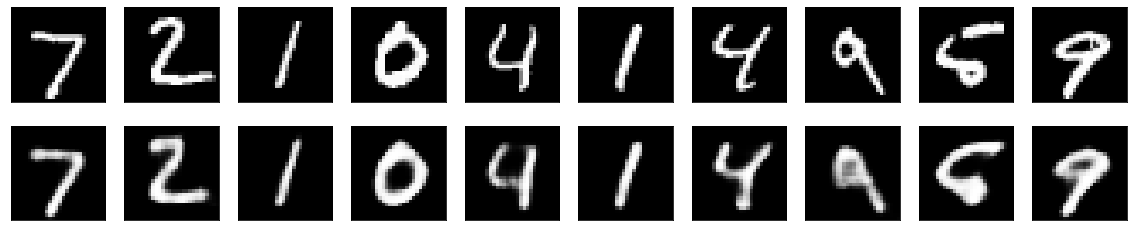

In [13]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction or noisy 
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(imgs_pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)